## XOR Problem

[Learning internal representations by error propagation](https://apps.dtic.mil/dtic/tr/fulltext/u2/a164453.pdf) (1985)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# np.random.seed(123)

In [3]:
def sigmoid(x): 
    return 1 / (1 + np.exp(-x))

def sigmoid_backward(sx):
    return sx * (1 - sx)

In [4]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) # Input data
y = np.array([[0, 1, 1, 0]]).T # XOR Problem

In [5]:
# Define layers - Encoding (Input), Hidden & Output
_, encoding_dim = x.shape
hidden_dim = 5
output_dim = len(y.T)

# Init weights
w1 = np.random.random((encoding_dim, hidden_dim))
w2 = np.random.random((hidden_dim, output_dim))

In [6]:
epochs = 5000
lr = 0.3
loss = []

for _ in range(epochs):

    # Forward pass
    hidden = sigmoid(x @ w1)
    logits = sigmoid(hidden @ w2)

    # Backprop - Chain rule
    output_error = y - logits # Prediction error
    dt_do = output_error * sigmoid_backward(logits) # Target direction

    hidden_error = dt_do @ w2.T # Layer 1 contribution to layer 2 error (according to weights)
    dt_dh = hidden_error * sigmoid_backward(hidden)

    # Update weights - Delta rule
    w2 += lr * (hidden.T @ dt_do)
    w1 += lr * (x.T @ dt_dh)

    loss.append(abs(sum(output_error)/len(y))) # Callback error

In [7]:
for x, y in zip(x, y):
    h_pred = sigmoid(x @ w1)
    y_pred = sigmoid(h_pred @ w2)

    print('Input:', x, [int(sample > 0.5) for sample in x], '| Ground Truth:', y, '| Prediction:', int(y_pred > 0.5))

Input: [0 0] [0, 0] | Ground Truth: [0] | Prediction: 0
Input: [0 1] [0, 1] | Ground Truth: [1] | Prediction: 1
Input: [1 0] [1, 0] | Ground Truth: [1] | Prediction: 1
Input: [1 1] [1, 1] | Ground Truth: [0] | Prediction: 0


(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss'))

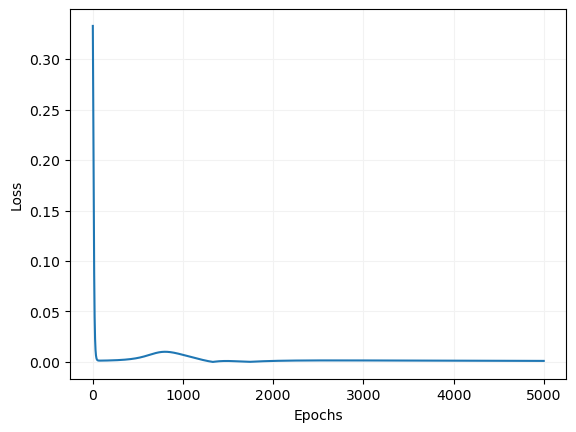

In [8]:
plt.figure()
plt.plot(loss)
plt.grid(axis='both', color='0.95')
plt.xlabel('Epochs'), plt.ylabel('Loss')